<div style="text-align: center; font-size: 25px;">
Trực quan hóa dữ liệu - CQ2021/21 <br>
Nhóm 02<br>
TLab 02: Working with Time-series data <br>
Chủ đề: Visualize about the climate in Indonesia
</div>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('climate.csv')

# C. Khám phá mối quan hệ trong dữ liệu

### Temperature

#### Line plot

Lý do chọn biểu đồ: 
* Biểu đồ giúp ta có thể tìm ra các tỉnh có nhiệt độ trung bình và xu hướng nhiệt độ đặc biệt khác so với phần đông các tỉnh còn lại. Ta cũng có thể thấy được xu hướng thay đổi nhiệt độ theo thời gian của từng tỉnh bằng cách chọn tên tỉnh, biểu đồ của tỉnh đó sẽ hiện ra, đồng thời có thể chọn thêm các tỉnh khác để so sánh nhiệt độ qua từng năm. Biểu đồ được biểu diễn theo năm để dễ dàng hơn cho người xem. Ban đầu nên chọn "Ẩn tất cả" để dễ quan sát.

Lý do chọn màu: 
* Giúp người đọc dễ phân biệt đường nhiệt độ của các tỉnh hơn

Kỹ thuật áp dụng:
* Hover data: Khi người dùng di chuột qua một điểm dữ liệu, một tooltip sẽ xuất hiện hiển thị tất cả giá trị ở điểm dữ liệu đó.
* Zoom và cuộn: Người dùng có thể sử dụng công cụ zoom và cuộn để phóng to hoặc thu nhỏ các phần cụ thể của biểu đồ.
* Selection: người dùng có thể nhấp vào từng province_name ở list bên phải để ẩn hoặc hiện đường nhiệt độ của tỉnh đó trên biểu đồ. Có thể ẩn hoặc hiện tất cả tỉnh bằng nút bên trái

In [11]:
df_temp_year = df.groupby(['year','province_name'],as_index=False)['Tavg'].mean()
fig = px.line(df_temp_year, x="year", y="Tavg", color="province_name")
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [{'visible': True}],
                    'label': 'Hiển thị tất cả',
                    'method': 'update'
                },
                {
                    'args': [{'visible': 'legendonly'}],
                    'label': 'Ẩn tất cả',
                    'method': 'update'
                }
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

fig

Nhận xét:
* Xu hướng nhiệt độ của các tỉnh chia ra nhiều nhóm thể hiện các khu vực có sự tương đồng về điều kiện khí hậu.
* Nhiệt độ của Indonesia có xu hướng tăng dần qua các năm.
* Tỉnh Jawa Barat có nhiệt độ thấp hơn khá rõ ràng so với các tỉnh còn lại.

Đánh giá sự phù hợp:
* Biểu đồ đường giúp bạn dễ dàng quan sát sự thay đổi của nhiệt độ trung bình (Tavg) theo từng năm (year) của các tỉnh (province_name) khác nhau.
* Vạch kẻ theo màu (hue) giúp phân biệt nhiệt độ trung bình của từng tỉnh theo năm.
* Tuy nhiên, số lượng tỉnh quá nhiều, biểu đồ đường trở nên rối mắt hơn so với các biểu đồ khác như biểu đồ vùng (area plot)

#### Heatmap

Lý do chọn biểu đồ: 
* Heatmap cho phép biểu diễn một lượng lớn dữ liệu trên một diện tích hạn chế. 
* Màu sắc trong Heatmap giúp người dùng dễ dàng so sánh các giá trị nhiệt độ giữa các tháng hoặc năm, cũng như nhận diện xu hướng, mẫu hình hoặc bất thường trong dữ liệu. 
* Các giá trị nhiệt độ cao và thấp sẽ được thể hiện bằng các màu sắc đặc trưng, giúp người dùng nhanh chóng nhận ra sự khác biệt.

Lý do chọn màu sắc: 
* Màu coolwarm cung cấp sự tương phản cao giữa các mức nhiệt độ khác nhau, giúp dễ dàng nhận biết các khu vực nóng và lạnh trên biểu đồ.
* Các sắc thái xanh lam và đỏ biểu diễn các giá trị thấp và cao, dễ phân biệt cho người bị mù màu.
* Việc sử dụng dải màu liên tục từ xanh lam đến đỏ giúp tạo ra hiệu ứng chuyển màu mượt mà, giúp người xem dễ dàng theo dõi sự thay đổi nhiệt độ theo thời gian.
* Màu coolwarm thu hút sự chú ý của người xem đến các vùng cực đoan, nơi có sự biến động nhiệt độ lớn nhất.
* Việc sử dụng màu sắc tươi sáng và rực rỡ có thể giúp thu hút sự chú ý của người xem và khiến họ quan tâm nhiều hơn đến dữ liệu được hiển thị.

Text(0.5, 1.0, 'Heatmap of Temperatures in Indonesia')

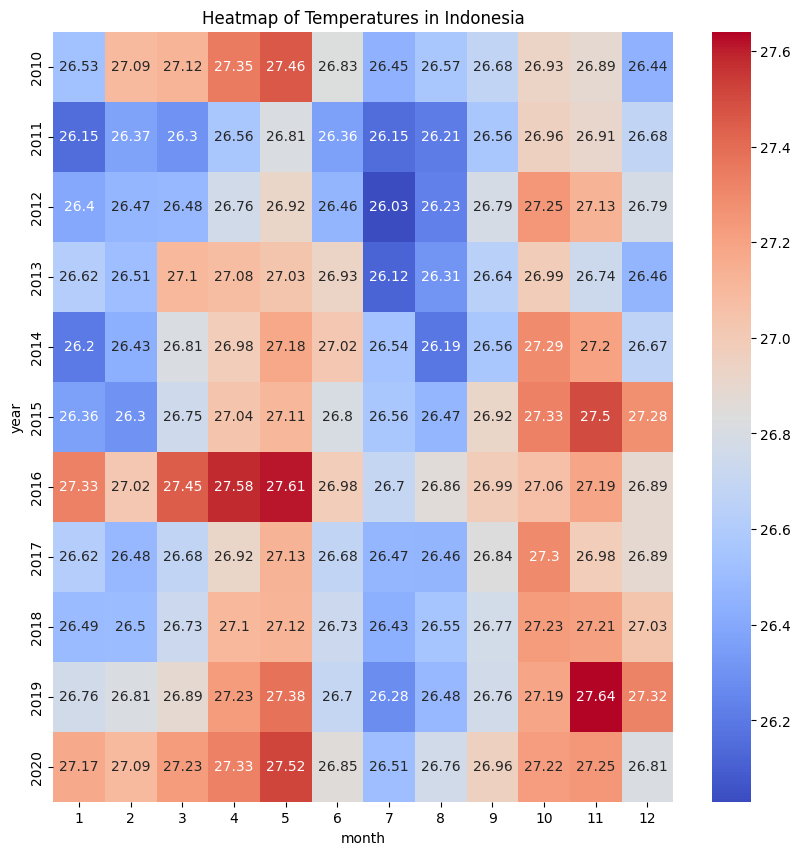

In [12]:
df_temp_month = df.groupby(['year', 'month'],as_index=False)['Tavg'].mean()
matrix = df_temp_month.pivot(index='year', columns='month', values='Tavg').round(2)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, fmt='', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Temperatures in Indonesia')

Sau khi sử dụng màu sắc, ta rút ra được nhận xét:

* Chu kỳ
    * Tháng 1-2, 7-8: nhiệt độ mát nhất năm
    * Tháng 3-6, 9-12: nhiệt độ cao nhất năm
* Nhiệt độ ngày càng cao hơn qua các năm.
* Xuất hiện một số tháng có nhiệt độ cao bất thường.
* Năm 2016 nóng hơn hầu hết các năm được ghi nhận trong data.
* Năm 2011 là năm duy nhất có mức nhiệt không chạm đến ngưỡng 27 độ.
* Tháng 7 là tháng duy nhất có mức nhiệt không chạm đến ngưỡng 27 độ.


Đánh giá sự phù hợp:
* Sử dụng heatmap trong trường hợp này là phù hợp để tổng quan về sự phân bố nhiệt độ theo tháng qua các năm. 
* Màu sắc thể hiện sự khác biệt của giá trị trung bình nhiệt độ, giúp người xem nhanh chóng nhận ra tháng nào nóng nhất và tháng nào lạnh nhất trong năm.
* Tuy nhiên, khả năng so sánh chi tiết giữa các giá trị nhiệt độ theo từng tháng trong những năm khác nhau trên heatmap có thể khó khăn hơn so với các biểu đồ khác như đường (line) hoặc cột (bar).

### Humid

### Rain

### Windspeed

### Sunshine

- Các biểu đồ ở dưới chỉ tạm thời là ý tưởng, chưa nhận xét, etc, tak vào xem r nhận xét nhóe ahihi
- Thêm nữa là chọn màu lại cho hợp lý, giải thích ý tưởng, tại sao lại như z, etc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


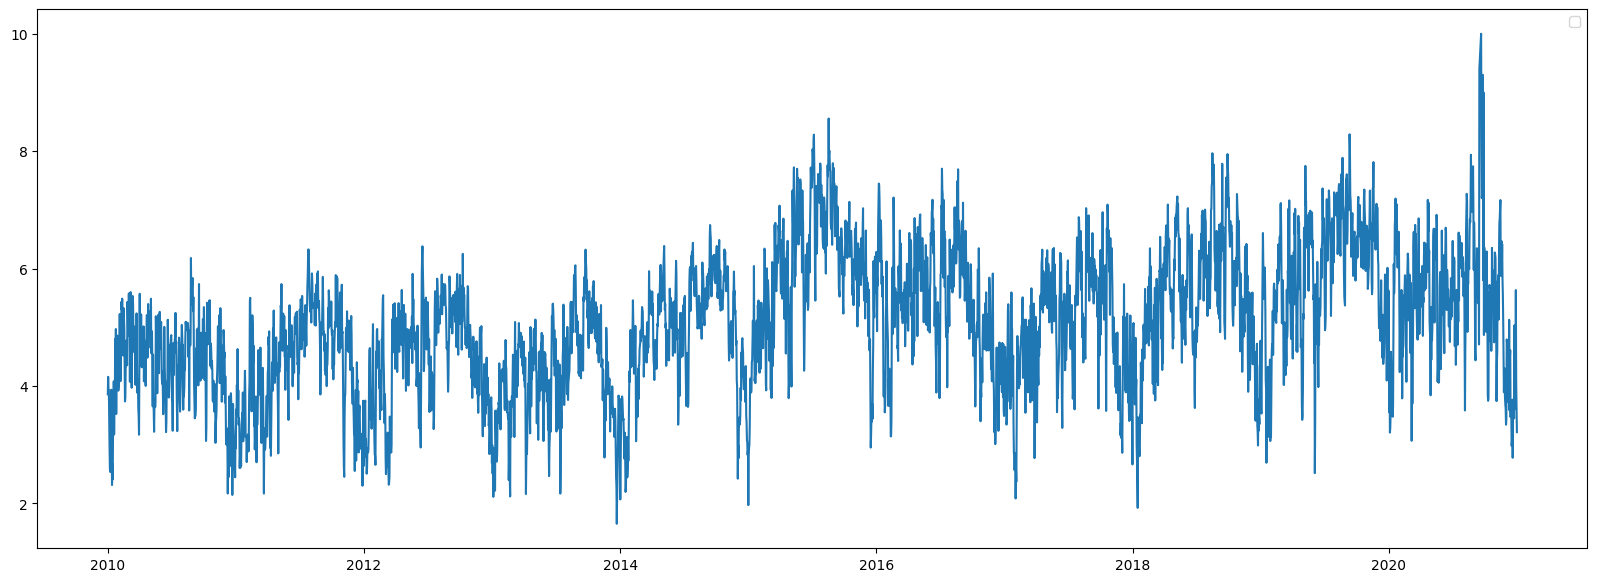

In [54]:
df_daily = df.groupby('date').agg({'ss': 'mean', 'Tavg': 'mean'}).reset_index()

plt.figure(figsize=(20, 7))
plt.plot(df_daily['date'], df_daily['ss'])
plt.legend()
plt.show()

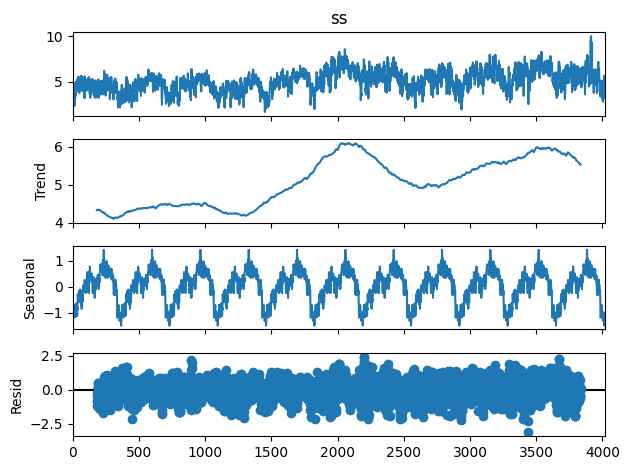

In [52]:
result = seasonal_decompose(df_daily['ss'], model='additive', period=365)
result.plot()
plt.show()

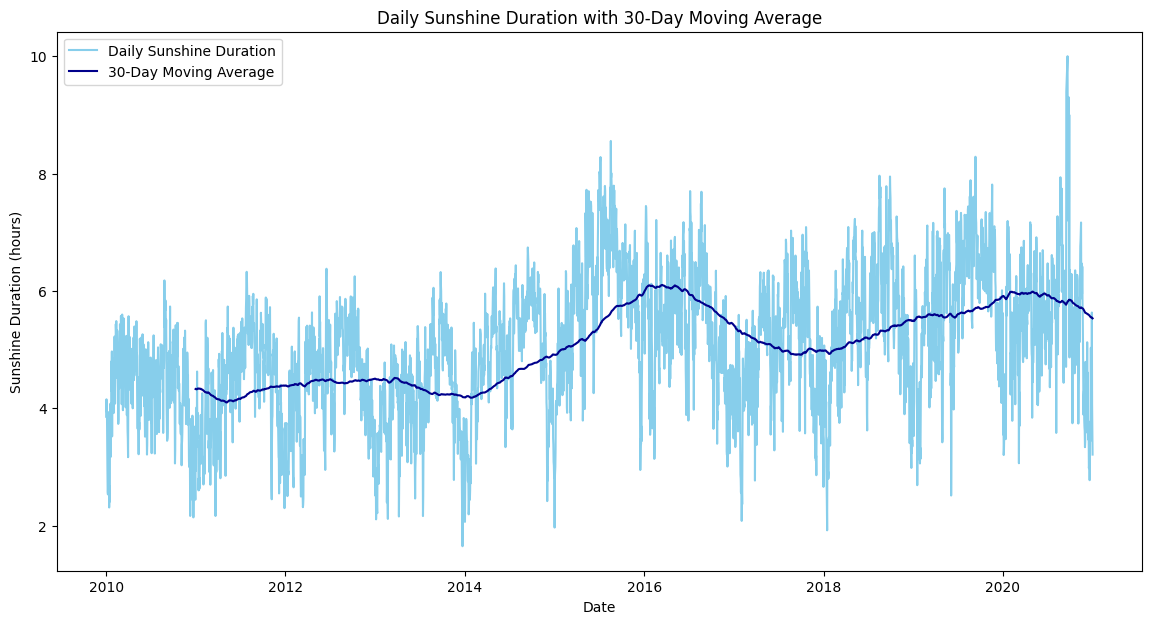

In [53]:
# Calculate moving average (window of 30 days)
df_daily['ss_MA'] = df_daily['ss'].rolling(window=365).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_daily['date'], df_daily['ss'], color='skyblue', label='Daily Sunshine Duration')
plt.plot(df_daily['date'], df_daily['ss_MA'], color='darkblue', label='30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration (hours)')
plt.title('Daily Sunshine Duration with 30-Day Moving Average')
plt.legend()
plt.show()

In [55]:
# Calculate moving averages
df_daily['Tavg_MA'] = df_daily['Tavg'].rolling(window=365).mean()

# Create the plot
fig = px.line(df_daily, x='date', y=['ss', 'Tavg_MA'], 
              labels={'value': 'Values', 'date': 'Date'}, 
              title='Sunshine Duration and Average Temperature with Moving Averages')
fig.update_traces(marker=dict(size=12), line=dict(width=2))
fig.update_layout(legend_title_text='Legend')
fig.show()

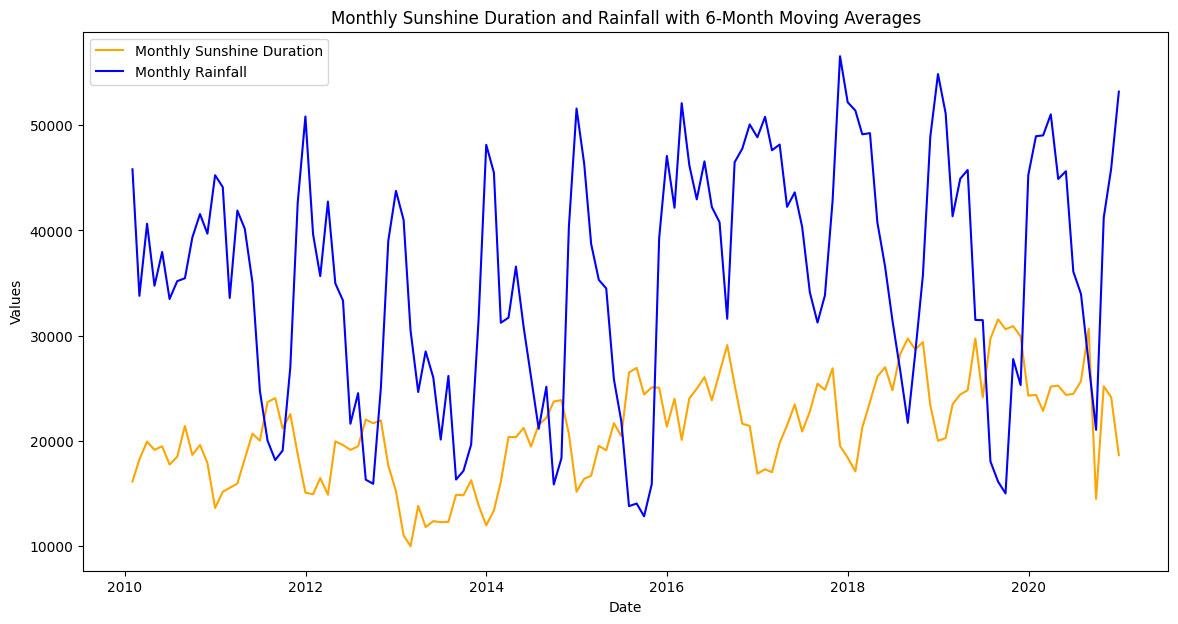

In [56]:
# Resample to monthly data
df_monthly = df.resample('M', on='date').sum()

# Calculate moving averages
df_monthly['ss_MA'] = df_monthly['ss'].rolling(window=6).mean()
df_monthly['RR_MA'] = df_monthly['RR'].rolling(window=6).mean()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly['ss'], color='orange', label='Monthly Sunshine Duration')
#plt.plot(df_monthly.index, df_monthly['ss_MA'], color='red', label='6-Month Moving Average (Sunshine Duration)')
plt.plot(df_monthly.index, df_monthly['RR'], color='blue', label='Monthly Rainfall')
#plt.plot(df_monthly.index, df_monthly['RR_MA'], color='navy', label='6-Month Moving Average (Rainfall)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Monthly Sunshine Duration and Rainfall with 6-Month Moving Averages')
plt.legend()
plt.show()

##### ARIMA model

- Testing model

predicted=4.0991204778957915, expected=4.924884006978338
predicted=4.712816546141777, expected=4.189685192058864
predicted=4.231518449035864, expected=4.02090766238868
predicted=4.049282491872614, expected=4.782054089983985
predicted=4.600634627595293, expected=4.518491488789512
predicted=4.48541420908645, expected=5.014947897839629
predicted=4.8843381782059865, expected=4.6580110543771625
predicted=4.678371571313505, expected=5.5288445350328885
predicted=5.2400585938406765, expected=5.300310705721796
predicted=5.274436289945234, expected=5.558614381748075
predicted=5.383859813484621, expected=5.4486576591143105
predicted=5.442178489555617, expected=6.071450026483584
predicted=5.835069396454544, expected=6.166648602672839
predicted=6.070576291216182, expected=6.321100012898736
predicted=6.165467196494306, expected=5.309941905143022
predicted=5.503066716521407, expected=5.250270011571407
predicted=5.330345101047491, expected=5.9533806509432
predicted=5.907886562601891, expected=5.521086

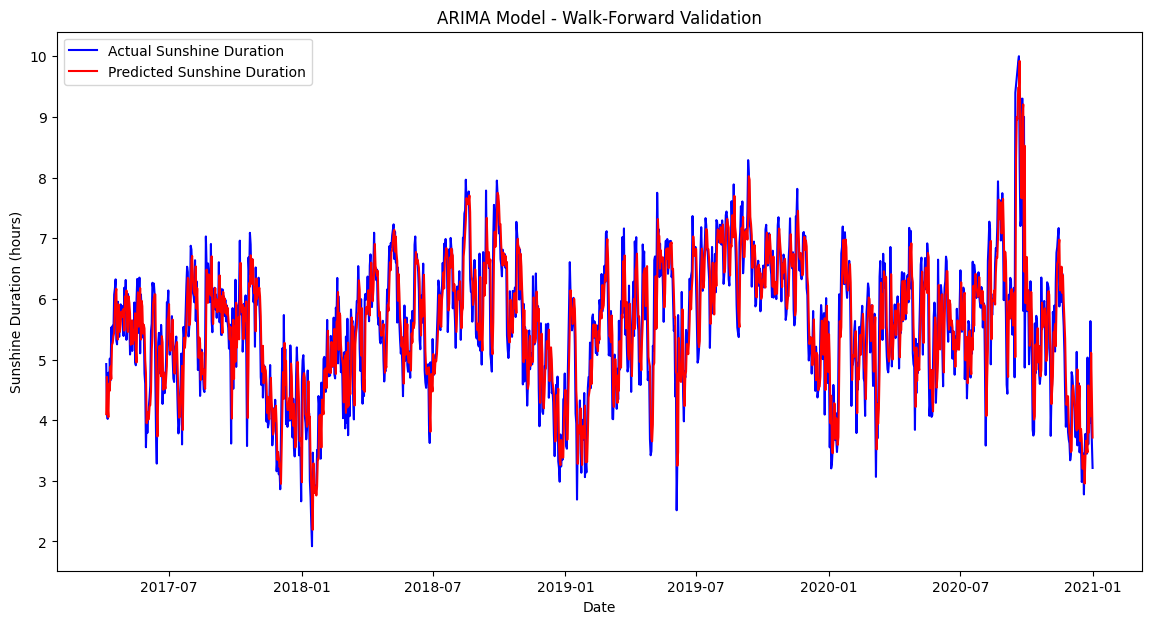

In [73]:
# Prepare data
df_copy = df_daily.set_index('date')

size = int(len(df_copy) * 0.66)
train, test = df_copy.iloc[0:size], df_copy.iloc[size:len(df_copy)]

history = [x for x in train['ss']]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['ss'].iloc[t]
    history.append(obs)
    
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['ss'], label='Actual Sunshine Duration', color='blue')
plt.plot(test.index, predictions, label='Predicted Sunshine Duration', color='red')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration (hours)')
plt.title('ARIMA Model - Walk-Forward Validation')
plt.legend()
plt.show()

- Predict

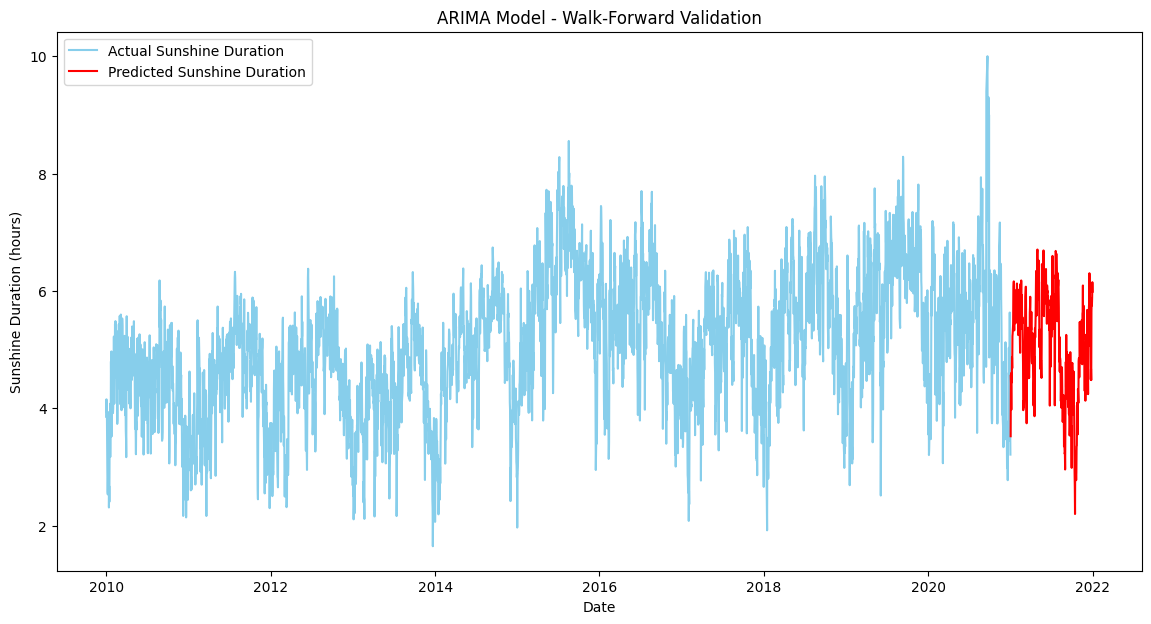

In [84]:
# Prepare data
df_copy = df_daily.set_index('date')

history = [x for x in df_copy['ss']]
predictions = list()

# walk-forward validation
for t in range(365):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['ss'].iloc[t]
    history.append(obs)

start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')

forecast_days = (end_date - start_date).days + 1
forecast_index = pd.date_range(start=start_date, periods=forecast_days, freq='D')

plt.figure(figsize=(14, 7))
plt.plot(df_copy.index, df_copy['ss'], color='skyblue', label='Actual Sunshine Duration')
plt.plot(forecast_index, predictions, label='Predicted Sunshine Duration', color='red')
plt.xlabel('Date')
plt.ylabel('Sunshine Duration (hours)')
plt.title('ARIMA Model - Walk-Forward Validation')
plt.legend()
plt.show()